# Gender Prediction from Voice attributes 

1 target variable: label (male or female)

20 independent variables:
1. meanfreq: mean frequency of the voice audio of the person (in kHz)
2. sd: standard deviation of the frequency of the voice audio
3. median: median frequency of the voice audio (in kHz)
4. Q25: first quantile (in kHz)
5. Q75: third quantile (in kHz)
6. IQR: interquantile range (in kHz)
7. skew: Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution
8. kurt: Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.
9. sp.ent: spectral entropy
10. sfm: spectral flatness
11. mode: mode frequency
12. centroid: frequency centroid (see specprop)
13. meanfun: mean fundamental frequency measured across acoustic signal
14. minfun: minimum fundamental frequency measured across acoustic signal
15. maxfun: maximum fundamental frequency measured across acoustic signal
16. meandom: mean of dominant frequency measured across acoustic signal
17. mindom: minimum of dominant frequency measured across acoustic signal
18. maxdom: maximum of dominant frequency measured across acoustic signal
19. dfrange: range of dominant frequency measured across acoustic signal
20. modindx: modulation index

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Imported libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
  
#Sklearn Metrics
from sklearn.metrics import confusion_matrix,classification_report

### Exploratory Data Analysis

#### Reading Data 

In [4]:
df = pd.read_csv('gender_voice_dataset.csv')

In [5]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
* If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
* If the skewness is less than -1 or greater than 1, the data are highly skewed.

#### Checking for Missing values

In [6]:
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

#### Statistical Description of Dataset

In [7]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


You can see for columns like Q25 and maxdom we have very large range as compared to other columns, for this we have have to standardize or normalize the data.

#### Correlation Matrix

<AxesSubplot:>

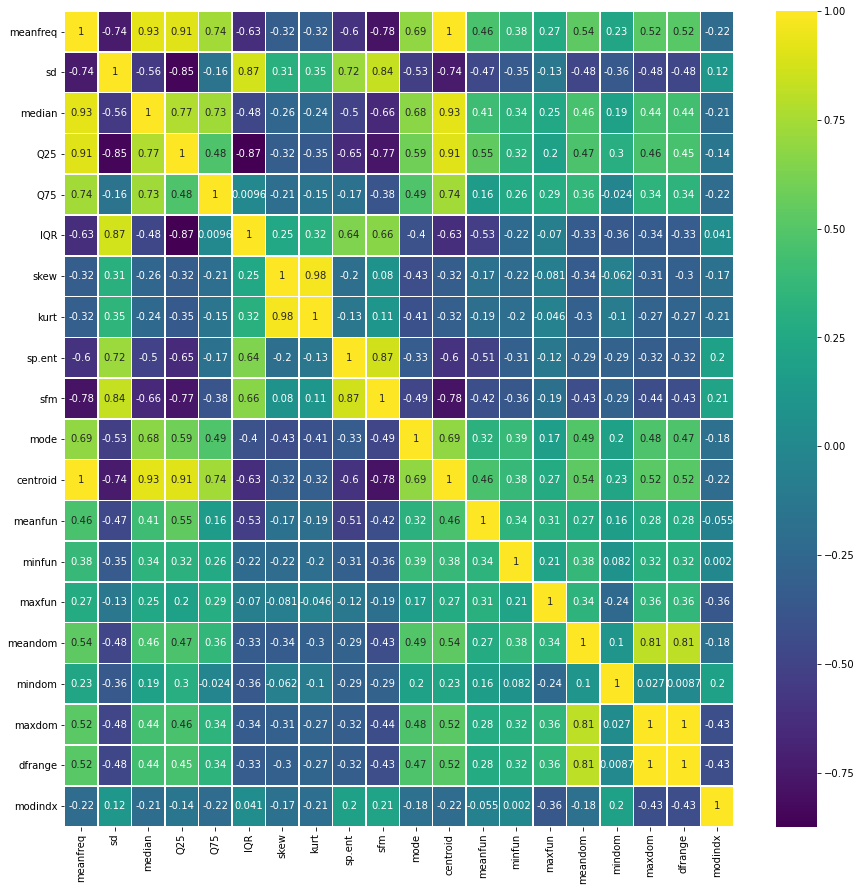

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

We already understood about correlation, from here we can see that alot of columns are directly or inversely correlated with some other columns having correlation value as high as 0.98 <br>
Hence we will be removinfg some columns that don't help the model in learning or generalizing over the data.

C:\Users\pulkit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


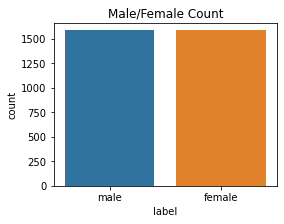

In [9]:
fig, ax = plt.subplots(figsize=(4,3))
sns.countplot(df['label'], ax=ax)
plt.title('Male/Female Count')
plt.show()

There is no case of imbalance class

In [10]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=6b15b3fff2c257a942b3f2917dcfe1e26497ac30b5a2302dbfb91353aa2195b5
  Stored in directory: c:\users\pulkit\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [11]:
import mglearn

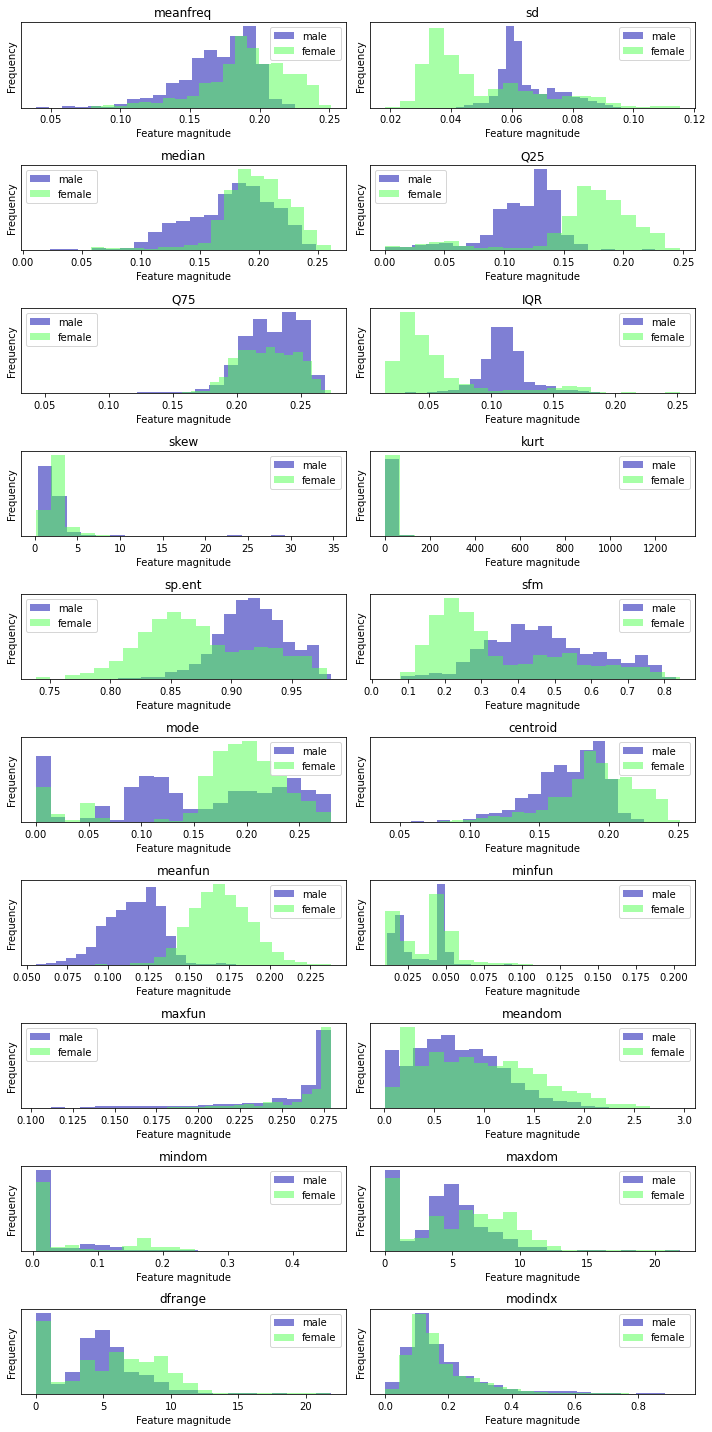

In [12]:
#Plot the histograms
male = df.loc[df['label']=='male']
female = df.loc[df['label']=='female']
fig, axes = plt.subplots(10, 2, figsize=(10,20))
ax = axes.ravel()
for i in range(20):
    ax[i].hist(male.iloc[:,i], bins=20, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(female.iloc[:, i], bins=20, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(list(male)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["male", "female"], loc="best")

fig.tight_layout()

From the graph we can see which are the columns that able to define male and female separetely.

## Model Building

In [14]:
df_new = df.drop(['dfrange', 'kurt', 'sfm', 'meandom', 'meanfreq'], axis = 1)

In [15]:
df_new.columns

Index(['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'sp.ent', 'mode',
       'centroid', 'meanfun', 'minfun', 'maxfun', 'mindom', 'maxdom',
       'modindx', 'label'],
      dtype='object')

### Creating X and y

In [16]:
X = df_new.drop(['label'], axis = 1)
y = df_new['label']

### Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

## 1. SVM (Support Vector Machine)

In [18]:
#Train support vector machine model
svm = SVC().fit(X_train, y_train)
print("Support Vector Machine")
print("Accuracy on training set: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svm.score(X_test, y_test)))

Support Vector Machine
Accuracy on training set: 0.73
Accuracy on test set: 0.74


## 2. Random Forest Model

In [19]:
#Train random forest model
forest = RandomForestClassifier(n_estimators=500, random_state=42).fit(X_train, y_train)
print("Random Forests")
print("Accuracy on training set: {:.2f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(forest.score(X_test, y_test)))

Random Forests
Accuracy on training set: 1.00
Accuracy on test set: 0.98


### Saving the Model

In [20]:
# save the model to disk
import pickle
filename = 'gender_voice_model.pickle'
pickle.dump(forest, open(filename, 'wb'))

In [21]:
# load the model from disk
filename = 'gender_voice_model.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
print("Accuracy on test set: {:.2f}".format(loaded_model.score(X_test, y_test)))

Accuracy on test set: 0.98
